In [38]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import os
import cv2
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

In [2]:
from skimage.color import rgb2gray

In [3]:
image_names = []
label_names = []
training_dir = "/scratch/toml/sn7/train"
for location in os.listdir(training_dir):
    label_path = f"{training_dir}/{location}/global_monthly_2018_01_mosaic_{location}_Buildings_cropped.tif"
    label_names.append(label_path)
    # reference TCI image
    image_path = f"{training_dir}/{location}/images/ref/TCI.tif"
    image_names.append(image_path)


In [59]:
# images = [cv2.imread(image_name) for image_name in image_names]
upscale = 6
images = []
for image_name in image_names:
    image = cv2.imread(image_name)
    image = rgb2gray(image)
    image = cv2.resize(image, (image.shape[0]*upscale, image.shape[1]*upscale))
    image = image[:256, :256]
    images.append(image)


# labels = [cv2.imread(label_name) for label_name in label_names]
labels = []
for label_name in label_names:
    with rio.open(label_name) as src:
        label = src.read(1)
    # label = rgb2gray(label)
    label = label[:256, :256]
    labels.append(label)

In [64]:
image_dataset = np.array(images)
labels_dataset = np.array(labels)
# image_dataset = np.expand_dims(image_dataset, axis=3)

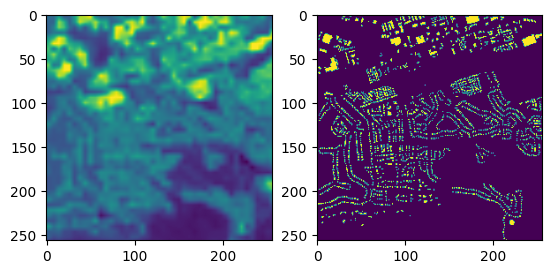

In [63]:
# plot image n and label n in subplots
n = 1
fig, ax = plt.subplots(1,2)
ax[0].imshow(images[n])
ax[1].imshow(labels[n])
for i,l in images, labels:
    print(i.shape, l.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(image_dataset.reshape(-1,1))
image_dataset = scaler.transform(image_dataset.reshape(-1,1)).reshape(image_dataset.shape)
